In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('D:\\churn.csv') # import the dataset

import warnings
warnings.filterwarnings('ignore')  # filter the annoying warning reminder

In [2]:
data.head(10)  # make a preview

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [3]:
print(data.columns.tolist(),'\n',len(data.columns.tolist()))

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'] 
 21


# Exploratory Data Analysis(EDA)

Using figures to overall master the data.

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6),dpi = 300)
fig.set(alpha = 0.3)
plt.subplot2grid((1,3),(0,0))
data['Churn?'].value_counts().plot(kind = 'bar')
plt.title('states of churn')
plt.ylabel('numbers')

plt.subplot2grid((1,3),(0,2))
data['CustServ Calls'].value_counts().plot(kind = 'bar')
plt.title('customer service times')
plt.ylabel('times')

plt.show()

<Figure size 2400x1800 with 2 Axes>

The figure one shows that the states of customer churn has 2 states and the numbers of each states is quite normal. So the dataset could be diacritical. Figure two shows times of customer servise calls. From 1 to 9, the times counts decreased. This condation is normal. Beacuse times of customer service calls show the disqualified and if one customer calls cus-service line too many times, then probably she or he won't use this.

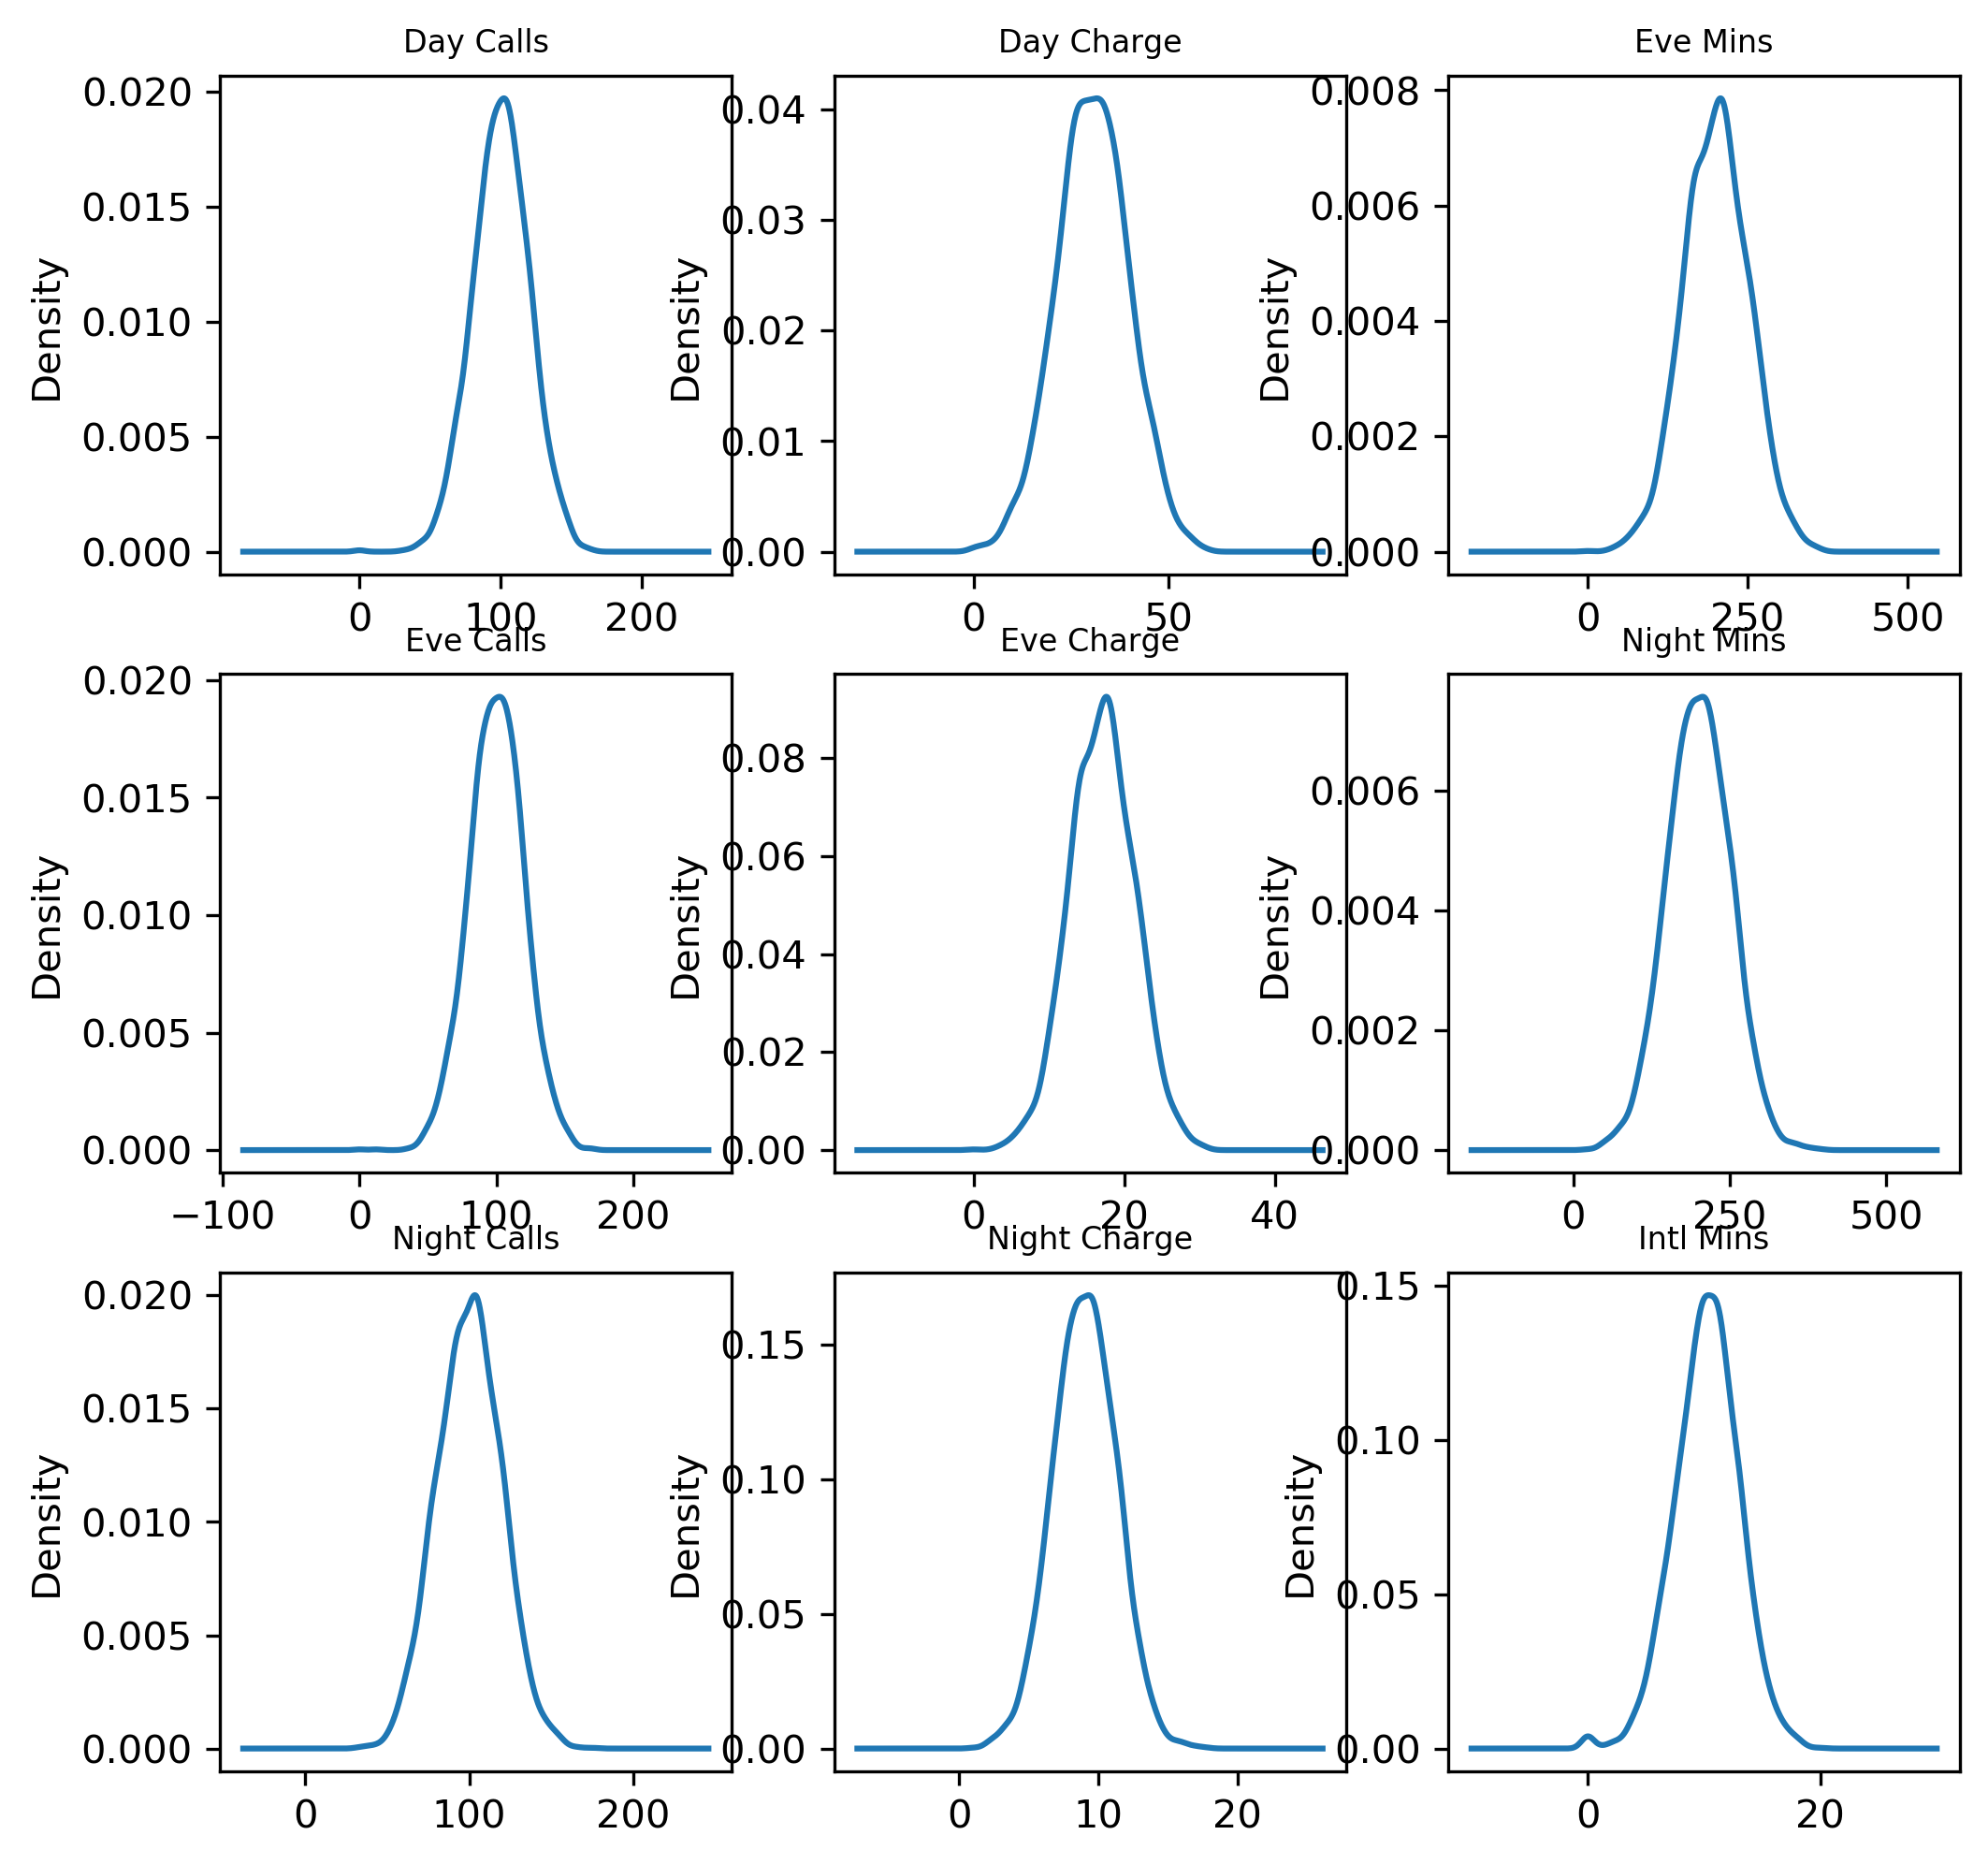

In [5]:
fig = plt.figure(figsize = (8,8),dpi = 300)
fig.set(alpha = 0.3)
def draw_density(p,feature):
    """a method to create figures"""
    plt.subplot2grid((3,3),p)
    data[feature].plot(kind = 'kde')
    plt.title(f'{feature}',fontsize = 8)

plist = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
feature_list = data.columns.tolist()

for i in range(9):
    # create 3*3 plot.
    draw_density(p = plist[i], feature = feature_list[feature_list.index('Day Calls') + i])

plt.show()

We can conclude that the distribution of 9 features appears are all **Gaussian Distribution**. But except that, we can't get more information from the figures...

Then what about the relationship between **Int's Plan** or **Vmail Plan** and **Churn?**, let's make it visable.

In [6]:
def darw_stack_bar(feature,f_res_list):
    """a method used to create statistic stack bar plot"""
    fig = plt.figure(figsize = (8,8),dpi = 300)
    fig.set(alpha = 0.3)
    yes = data['Churn?'][data[feature] == f_res_list[0]].value_counts()
    no = data['Churn?'][data[feature] == f_res_list[1]].value_counts()
    sd = pd.DataFrame({f'{feature}:yes':yes,f'{feature}:no':no})
    
    sd.plot(kind = 'bar' , stacked = True)
    plt.title(f'Relationship btween {feature} and Churn?')
    plt.ylabel('Numbers')
    plt.xlabel('Churn Conditon')
    
    plt.show()

<Figure size 2400x2400 with 0 Axes>

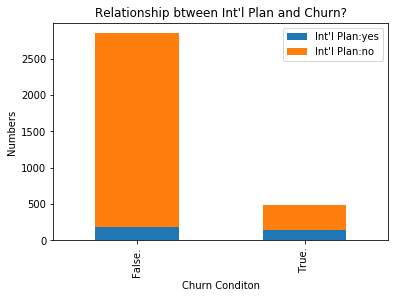

In [7]:
darw_stack_bar("Int'l Plan",['yes','no'])

It's interesting! If **Churn?** has no relationship with **Int'l Plan**, the numbers of **Int'l Plan:yes** or **Int'l Plan:no** will be the same share while churn or not. But it isn't. So we can conclude that people who have Internation plan going to be a churn one, maybe for having more chioce?Then what alout **Vmail Plan**?

<Figure size 2400x2400 with 0 Axes>

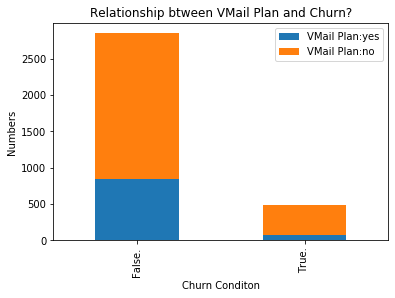

In [8]:
darw_stack_bar("VMail Plan",['yes','no'])

Yes, they are rarely linked...

Next we want to find some info from **CustServ Calls**:

Text(0.5, 0, 'Nums of CustServ Calls')

<Figure size 2400x2400 with 0 Axes>

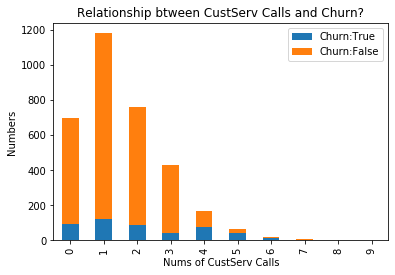

In [9]:
# create a realtionship plot between CustServ Calls and Churns.
fig = plt.figure(figsize = (8,8),dpi = 300)
fig.set(alpha = 0.3)
yes = data['CustServ Calls'][data['Churn?'] == 'True.'].value_counts()
no = data['CustServ Calls'][data['Churn?'] == 'False.'].value_counts()
sd = pd.DataFrame({'Churn:True':yes,'Churn:False':no})

sd.plot(kind = 'bar' , stacked = True)
plt.title('Relationship btween CustServ Calls and Churn?')
plt.ylabel('Numbers')
plt.xlabel('Nums of CustServ Calls')

# Feature Enginerring

## 1. drop valueless features
There are **20 features** and **1 label** in the dataset. But some features, such as *State*, *Account Length*, *Area Code* and *Phone*, are useless for our aim. So a adoptive way is droping them (Here we have implicated that the *State* didn't cross linkded with the customs'. But in fact they are assosiated in some ways. We should make another model to find the relationship...)
>Useless Features contribute nothing to our target model and meanwhile waste lots of running resource. So clarify the valueless features and delete them is important.

In [10]:
data.drop(['State','Account Length','Area Code','Phone'],axis = 1,inplace = True)
print(data.columns.tolist(),'\n',len(data.columns.tolist()))
print('\n')
data.info()

["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'] 
 17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            333

## 2. convert features' type
Some of the features, such as *Int'l Plan*,*VMail Plan* ,are ***object***, which can't identify by model(except **decision-making tree algorithm**?). So we should convert the object type to int or float type. Here are the ways:

In [11]:
Int_Plan = pd.get_dummies(data["Int'l Plan"],prefix = "_int_plan") # hot-encode process
#print(Int_Plan)
Vmail_Plan = pd.get_dummies(data["VMail Plan"],prefix = "_vmail_plan")
#print(Vmail_Plan)


y = np.where(data['Churn?'] == 'True.',1,0)  # our target label
#len(y) = 3333
np.set_printoptions(threshold=np.inf) # unfold the display result of array
pd.options.display.max_columns = None # unfold the display result of DataFarme
#print(y)

data.drop(["Int'l Plan","VMail Plan",'Churn?'],axis = 1,inplace = True)
data1 = pd.concat([data,Int_Plan,Vmail_Plan],axis = 1)

After convertion, we got the a new dataframe **data1** which is qualified for SVM model.

In [12]:
data1.describe()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,_int_plan_no,_int_plan_yes,_vmail_plan_no,_vmail_plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.903090,0.096910,0.723372,0.276628
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.295879,0.447398,0.447398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,1.000000,0.000000,1.000000,1.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000,1.000000


## 3. stardardizion
From the ***data1.describe()***, we can find that there are some features' value region are very distinct with others.
>If the value regions of features are very large and various, then the running speed of model would be very slow, feathermore, the model would also be unstable.

So we should stardardize the values.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = data1[list(data1.columns)[:-4]]
x2 = data1[list(data1.columns)[-4:]]

x1_columns = x1.columns.tolist()

x1 = x1.as_matrix().astype(np.float)  #convert to float matrix
x1 = scaler.fit_transform(x1)

x = pd.concat([pd.DataFrame(x1,columns = x1_columns),x2],axis = 1)

In [14]:
x

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,_int_plan_no,_int_plan_yes,_vmail_plan_no,_vmail_plan_yes
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,1,0,0,1
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,1,0,0,1
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,1,0,1,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0,1,1,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354,1,0,0,1
3329,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641,1,0,1,0
3330,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354,1,0,1,0
3331,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354,0,1,1,0


# Create Learning Model
Now x is sandardlized data,Next we should create a model to process our data. In this project, we could use ***LogisticRegression***,***SVM***,***KNN***, three models to training the data. Then compare the results about each algorithm, which provide us some outlook of the three models.

In [15]:
from sklearn.model_selection import KFold

def cv(x,y,clf_class,**kwargs): # define a cross valied learning process
    """function for a commen tamplate of learning"""
    kf = KFold(5,shuffle = True)  # set fold number == 5
    y_pred = y.copy()
    
    for train_index,test_index in kf.split(x):
        x_train,x_test = x[train_index],x[test_index]
        y_train = y[train_index]
        
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        
    return y_pred

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # one simple method to meausing the accuracy
    return np.mean(y_true == y_pred)

In [17]:
x = x.as_matrix()
# make dataframe to matrix type, in order to fit the model qualified data type.

In [18]:
for algorithm in [SVC,LR,KNN]:
    name = str(algorithm).split('.')[-1][:-2]
    print('the accuracy of ' + name + ' is:')
    print(accuracy(y,cv(x,y,algorithm)))

the accuracy of SVC is:
0.9183918391839184
the accuracy of LogisticRegression is:
0.8598859885988599
the accuracy of KNeighborsClassifier is:
0.8871887188718872


# Conclusion

In this small project, we have used **3** algorithm to training the data. The results show that the accuracy of SVM model is much heigher than others. So the SVM algrithm is much better.But for the results we get from this project, which are **0.919**, is still not satisfing. We should optimize it.
*BUT I DIDN'T DO*